In [1]:
!pip install biopython
!pip install reportlab
!pip install nglview


In [7]:
from Bio import Phylo
from Bio import SeqIO
from Bio import Entrez
from Bio import SeqIO
from Bio import GenBank 
import csv 
import re 
import matplotlib
import matplotlib.pyplot as plt
from Bio.Align.Applications import ClustalwCommandline
import os

with open("seq.txt", "r") as gen1:
    id_seq = gen1.readlines()
    Entrez.email = "mecr23mm@gmail.com"
    list_seq= [ ]
    for ids in id_seq:
         handle = Entrez.efetch(db="nucleotide", id=ids, rettype="fasta", retmode="text")
         secuencias = SeqIO.read(handle, "fasta")
         list_seq.append(secuencias)
         SeqIO.write(list_seq, "info.fasta", "fasta")

In [8]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pdb
listado=[]
for seq in SeqIO.parse("info.fasta", "fasta"):
    caracter= (seq.seq)
    prot=caracter.translate()
    listado.append(prot)
    lista= [linea.strip() for linea in prot]
print (listado)

listado=[item.replace ("*", "\n") for item in listado]
with open("proteinseq.txt", "w") as prote:
    for item in listado:
        item = item.replace ("\n\n","\n")
        prote.write(str(item)+"\n")

[Seq('NSRPSWR*R*AR*TCARSCTTRTTRSTG*YGTTWTTWATRRERKTWNKRPNRTT...FEN'), Seq('KELLELLRYNFKHD*YTIELNFPTMVRSFPVGILINRSCPLIFAFL*LKFPANN...EEI'), Seq('TN*FL*THKFIHLNFVKLI*TLKLLIEKRTTYQFSSLSSTPDCLINQSIDYRLE...ATK'), Seq('YN*SCSVSPSK**SGLGPELIWPAGFSL*SALWSGDRFGSDRSVVNVCFH*GPV...QKY'), Seq('YN*SCSVSPSK**SGLGPELIWPAGFSL*SALWSGDRFGSDRSVVNAQRRQHIN...FIN'), Seq('SRVPSPRAQRRQHINFKFDEDRANNCAGLSA*GIMLPFWKRLLYAAVIAGALVG...*SN')]


In [9]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqFeature import SeqFeature, FeatureLocation 
from Bio.SeqUtils import molecular_weight
import pandas as pd
import traceback
#import genes
def obtener_peso_molecular(lista_secuencias, output):
    name_prot=[]
    resultados=[]
    inest_cal= []
    tables = pd.DataFrame()
    try:
        for secuencia in lista_secuencias:
            datos_prot= ProteinAnalysis(secuencia)
            name_prot.append(datos_prot.sequence)
            peso_prot= datos_prot.molecular_weight()
            cal_inest_prot= datos_prot.instability_index() 
            resultados.append(peso_prot)
            if(cal_inest_prot == 0):
                cal_inest_prot=1.0
            inest_cal.append(cal_inest_prot)
        tables= pd.DataFrame(list(zip(name_prot, resultados, inest_cal)), columns =["Protein", "MolecularWeight", "InestavilityIndex"])
        tables.to_csv(output)
        return tables
    except Exception:
        return tables
        traceback.print_exc()
with open("proteinseq.txt", "r") as file:
    lineas= file.readlines()
    lista_datos= [linea.strip() for linea in lineas] 
    obtener_peso_molecular(lista_datos,"file.csv")
    


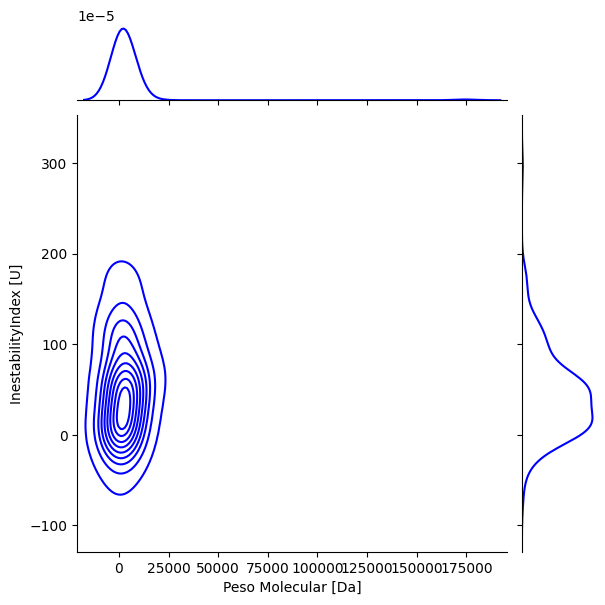

In [10]:
import pandas as pd
import seaborn as sms
import matplotlib.pyplot as plt

def figura(input, output):
    plot= sms.jointplot(data=input, x= "MolecularWeight", y= "InestavilityIndex", kind= "kde", color= "b")
    plot.set_axis_labels(xlabel="Peso Molecular [Da]", ylabel= "InestabilityIndex [U]")
    plt.savefig(output, dpi=300)
    plt.show()
with open("proteinseq.txt", "r") as file:
    lineas= file.readlines()
    lista_datos= [linea.strip() for linea in lineas] 
    entrada = obtener_peso_molecular(lista_datos,"file.csv")
    figura(entrada, "figure")